<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>


# Introducción al algoritmo de los k vecinos más próximos

<img src="https://github.com/davidreyblanco/ml-training/blob/master/resources/neighbor.jpeg?raw=true" width="400"></img>

Notebook por
[David Rey Blanco](https://www.linkedin.com/in/davidreyblanco).

*Recursos*: Los códigos de esta sesión y recursos se pueden encontra en el [repositorio](https://github.com/davidreyblanco/ml-training)
<br/>
<hr/>

El algoritmo de los K-Nearest-Neighbors o *K-Vecinos* es un algoritmo basado en instancias (o vago) y de tipo supervisado de Machine Learning. Puede usarse para clasificar elemementos (valores discretos) o para predecir valores continuos(regresión, valores continuos).

Es un algoritmo muy usado, y es simple, fácil de entender, *fácil de interpretar*, versátil y uno de los mejores de aprendizaje automático. KNN se utiliza en una amplia gama de aplicaciones como finanzas, salud, ciencias políticas, detección de escritura, reconocimiento de imágenes y video.

## Algoritmos vagos versus voraces

En inteligencia artificial los algoritmos vagos o basados en instancias se diferencian de los algoritmos voraces porque los primeros se construyen para cada caso que se evalúa, siendo su tiempo de construcción cero. Sus ventajas e inconvenientes son:

* Su **ventaja** es que son muy flexibles para adaptarse a las condiciones locales de la instancia que queremos predecir.
* Su principal **inconveniente** es que requieren mantener en memoria todo el conjunto de datos.
Otro inconveniente es que cuando no tienen información local no producen buenas predicciones (si las producen).

Los algoritmos voraces o basados en modelo sin embargo intentan generalizar un comportamiento a partir del conjunto de datos completo con la construcción de un modelo.
Estos algoritmos son costosos de construir pero muy eficientes en la ejecución, generalizan los comportamientos (a veces demasiado) Esta discusión también conocida como instance learners versus model learners.


## El algoritmo KNN
KNN es un algoritmo de aprendizaje vago y no paramétrico. No paramétrico significa que no hay suposiciones para la distribución de datos subyacente. En otras palabras, la estructura del modelo determinada a partir del conjunto de datos. Esto será muy útil en la práctica donde la mayoría de los conjuntos de datos del mundo real no siguen supuestos teóricos matemáticos. El algoritmo perezoso significa que no necesita ningún punto de datos de entrenamiento para la generación del modelo. Todos los datos de entrenamiento utilizados en la fase de prueba. Esto hace que el entrenamiento sea más rápido y la fase de prueba más lenta y costosa. La costosa fase de prueba significa tiempo y memoria. En el peor de los casos, KNN necesita más tiempo para escanear todos los puntos de datos y escanear todos los puntos de datos requerirá más memoria para almacenar los datos de entrenamiento.

![Imagen](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

Suponga que P1 es el punto, para el cual la etiqueta necesita predecir. Primero, encuentra el k punto más cercano a P1 y luego clasifica los puntos por voto mayoritario de sus k vecinos. Cada objeto vota por su clase y la clase con más votos se toma como predicción. Para encontrar puntos similares más cercanos, encuentre la distancia entre puntos utilizando medidas de distancia como la distancia euclidiana, la distancia de Hamming, la distancia de Manhattan y la distancia de Minkowski.

Nuestro algoritmo sigue estos tres pasos:

* Calcular la distancia
* Encuentra los K vecinos más cercanos
* Votación para la selección de la clase

![Imagen](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


### ¿Cómo funciona el algoritmo KNN?

En KNN, K es el número de vecinos más cercanos. El número de vecinos es el factor decisivo fundamental. K es generalmente un número impar si el número de clases es 2. Cuando K = 1, entonces el algoritmo se conoce como el algoritmo de vecino más cercano. Este es el caso más simple. Suponga que P1 es el punto, para el cual la etiqueta necesita predecir. Primero, busque el punto más cercano a P1 y luego la etiqueta del punto más cercano asignado a P1.

### La maldición de la dimensionalidad

KNN funciona mejor con una menor cantidad de variables que una gran cantidad de variables. Se puede decir que cuando aumenta el número de funciones, se requieren más datos, de forma que el incremento de las dimensiones también conduce al problema del sobreajuste. Para evitar el sobreajuste, los datos necesarios deberán crecer exponencialmente a medida que aumente el número de dimensiones (y esto como se puede suponer tiene un claro impacto en los tiempos de ejecución y la memoria necesaria). A este problema se lo conoce como **la maldición de la dimensionalidad**.

Para atacar el problema de la maldición de la dimensionalidad, debe pueden realizar actividades que nos reduzcan el número de dimensiones como un análisis de componentes principales antes de aplicar nuestro algoritmo de aprendizaje automático, o también puede usar el enfoque de selección de características (ambas no dejan de ser formas de reducir nuestro espacio de características de un número alto a un número más bajo, asegurando que la pérdida de información sea mínima y nuestros modelos no pierdan precisión).

Es importante tener en cuenta que en múltiples artículos de investigación se ha demostrado que en grandes dimensiones la distancia euclidiana ya no es útil. Por lo tanto, es muy importante la decisión que medida es más apropiada. Como hemos visto en el módulo de distancias en casos de alta dimensionalidad y espacios dispersos puede ser muy interesante usar la similitud del coseno en lugar de la euclídea porque es menos sensible al impacto de la alta dimensionalidad.


# Conjuntos de datos
(https://www.openml.org/s/76/data)

In [ ]:
# Importamos scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Importamos  train_test_split function
from sklearn.model_selection import train_test_split
# Tranformación de variables
from sklearn import preprocessing
import pandas as pd
import numpy as np
# Ignoramos los warning que no quedan muy bien
import warnings
warnings.filterwarnings('ignore')

# Una primera aproximación al algoritmo de k-vecinos

Vamos a hacer una primera prueba [del algoritmo de k-vecinos de scikit learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) con un primer clasificador de animales en función del peso (en kilos) de cada animal.

In [ ]:
# Importamos  de librerías
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Peso = [[2.5], [1.3], [0.8], [3.3],[120],[150],[133],[210]]
# 1 -> Gato
# 2 -> Tigre
clase = ['gato', 'gato', 'gato', 'gato', 'tigre', 'tigre','tigre','tigre']
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Peso, clase)
print(neigh.predict([[2.3]]))
print(neigh.predict([[199]]))

# Estimamos la probabilidad par aun animal de 2.3 kg
print(neigh.predict_proba([[2.3]]))
# Y si nos encontramos un animal del 80kg
print(neigh.predict([[80]]))
print(neigh.predict_proba([[80]]))

['gato']
['tigre']
[[1. 0.]]
['tigre']
[[0. 1.]]


## Jugando con las medidas de distancia

Vamos a poner a prueba nuestros conocimientos uniform le da la misma importancia a todas las instancias *(weights=uniform)*, que es el valor por defecto

In [ ]:
Peso = [[2.5], [1.3], [0.8], [3.3],[190]]
clase = ['gato', 'gato', 'gato', 'gato', 'tigre']
neigh = KNeighborsClassifier(n_neighbors=3, weights='uniform')
neigh.fit(Peso, clase)
print(neigh.predict([[2.3]]))
print(neigh.predict([[199]]))
print(neigh.predict_proba([[2.3]]))
print(neigh.predict_proba([[199]]))

['gato']
['gato']
[[1. 0.]]
[[0.66666667 0.33333333]]


*Pregunta)* ¿Qué está pasando ....?

Ahora vamos a probar con una versión del método que asigna un peso mayor a la instancia cuanto más cerca este de nuestro dato de entrada *(weights=distance)*

In [ ]:
Peso = [[2.5], [1.3], [0.8], [3.3],[190]]
clase = ['gato', 'gato', 'gato', 'gato', 'tigre']
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(Peso, clase)
print(neigh.predict([[2.3]]))
print(neigh.predict([[199]]))
print(neigh.predict_proba([[2.33]]))
print(neigh.predict_proba([[199]]))

['gato']
['tigre']
[[1. 0.]]
[[0.08407318 0.91592682]]


## El efecto de la normalización / estandarización de variables

Vamos a ver el efecto de la estandarización en la clasificación, ahora usaremos un ejemplo en el que tenemos un a lista de clientes, cada uno con dos atributos y una clase:

    * Gasto anual en euros
    * Edad
    * Clase: starter, senior

In [ ]:
# Probamos el algoritmo estandarizando las columnas
clientes = [[1200,30], [1350,35], [1550,60], [1400,55],[1600,75],[1400,20],[1120,25]]
clase_cliente = ['starter','starter','senior','senior','senior','starter','starter']
df = pd.DataFrame(clientes, columns=['gasto','edad'])
df

,gasto,edad
0,1200,30
1,1350,35
2,1550,60
3,1400,55
4,1600,75
5,1400,20
6,1120,25


Creamos nuestro modelo basado en los K=2 vecinos más cercanos

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(clientes, clase_cliente)
clientes_nuevos = [[1450, 28], [1185, 74]]
print(neigh.predict(clientes_nuevos))

['senior' 'starter']


Vamos a ver si cambia si normalizamos los datos ver [las funciones de preprocesado](https://scikit-learn.org/stable/modules/preprocessing.html)

In [ ]:
# Creamos un transformador
scaler_df = preprocessing.StandardScaler().fit(df.values)
# Re escalamos el conjunto de entrada
array_clientes_scaled = scaler_df.transform(df.values)
df_scaled = pd.DataFrame(array_clientes_scaled, columns=['gasto','edad'])
df_scaled

,gasto,edad
0,-1.090591,-0.674579
1,-0.151968,-0.412242
2,1.099530,0.899438
3,0.160907,0.637102
4,1.412404,1.686446
5,0.160907,-1.199251
6,-1.591190,-0.936915


Y re escalamos también los clientes nuevos

In [ ]:
# Re escalamos el conjunto de clasificación
clientes_nuevos_scaled = scaler_df.transform(clientes_nuevos)
clientes_nuevos_scaled

array([[ 0.47378117, -0.77951296],
       [-1.18445292,  1.63397908]])

Volvemos a clasificar nuestros casos y vemos como en este caso la edad no está *discriminada* por su escala y tenemos un valor más razonable para la clasificación

In [ ]:
# Transformamos los clientes originales
clientes_nuevos = [[1450,28], [1185,74]]
clientes_nuevos_scaled = scaler_df.fit_transform(clientes_nuevos)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(df_scaled.values, clase_cliente)
# Recordamos el
#clientes_nuevos = [[1450,28], [1185,74]]
print(neigh.predict(clientes_nuevos_scaled))

['starter' 'senior']


*Pregunta)* ¿Y por qué ahora funciona *bien*?

# Modelo de clasificación multiclase

Hasta ahora, ha aprendido a crear un clasificador KNN para dos en python usando scikit-learn. Ahora aprenderá sobre KNN con múltiples clases.

En el modelo de la parte de construcción, puede utilizar el conjunto de datos de vino, que es un problema de clasificación de clases múltiples muy famoso. Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región en Italia utilizando tres cultivares diferentes. El análisis determinó las cantidades de 13 componentes que se encuentran en cada uno de los tres tipos de vinos.

El conjunto de datos comprende 13 características:

* alcohol
* malic_acid
* ash
* alcalinity_of_ash
* magnesium
* total_phenols
* flavanoids
* nonflavanoid_phenols
* proanthocyanins
* color_intensity
* hue
* od280/od315_of_diluted_wines
* proline

y una variable objetivo, tipo de **cultivares**, con tres tipos de clases de cultivares:

* class_0
* class_1
* class_2

Aquí, puede construir un modelo para clasificar el tipo de cultivo. El conjunto de datos está disponible en la biblioteca scikit-learn, o también puede descargarlo de la biblioteca de aprendizaje automático de UCI.

## Carga de datos

Cargamos los datos del paquete sckitlearn

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

## Exploración básica

Una vez que haya cargado el conjunto de datos, es posible que desee saber un poco más sobre él. Puede comprobar los nombres de las funciones y los objetivos.

In [ ]:
# Mostrar características
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
# Mostramos las clases objetivo
print(wine.target_names)

['class_0' 'class_1' 'class_2']


Vemos las 3 primeras instancias del conjunto de datos

In [ ]:
print(wine.data[0:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


Mostramos las clases de los registros

In [ ]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Finalmente extraemos una serie de descriptivos, para ello transformamos el objeto de datos de scikit learn en un dataframe pandas

In [ ]:
data1 = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

data1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Creación de conjuntos de entrenamiento y validación

Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba es una buena estrategia.

Dividamos el conjunto de datos usando la función train_test_split (). Debe pasar 3 parámetros, características, destino y tamaño del conjunto de pruebas. Además, puede usar random_state para seleccionar registros al azar.

In [ ]:
# Split dataset into training set and test set 70% train/ 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

## Generación del modelo para K=5
Elegimos una K que se nos ocurra, por ejemplo K=5

In [ ]:
#Create KNN Classifier
K=5
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 1, 2])

### Evaluación del modelo para k = 5
Calculemos con qué precisión el clasificador o modelo puede predecir el tipo de cultivares.

La precisión se puede calcular comparando los valores reales del conjunto de prueba y los valores predichos.

La exactitud es una métrica para evaluar modelos de clasificación. Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente. Formalmente, la exactitud tiene la siguiente definición:

En la clasificación binaria, la exactitud (accuracy) también se puede calcular en términos de positivos y negativos de la siguiente manera:
$$
    Accuracy = \frac{Verdaderos Positivos + Verdaderos Negativos}{Total\ casos}
$$

Es decir cuantos casos acertamos

Más info sobre estas métricas en [Métricas en clasificadores curso de Google](https://developers.google.com/machine-learning/crash-course/classification/accuracy)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6851851851851852


## ¿Cómo se decide el número de vecinos en KNN?

Ahora que ya entendemos el funcionamiento del algoritmo, surge la pregunta ¿Cómo elegir el número óptimo de vecinos? ¿Y cuáles son sus efectos sobre el clasificador? El número de vecinos (K) en KNN es un hiperparámetro que debe elegir en el momento de la construcción del modelo. Puede pensar en K como una variable de control para el modelo de predicción.

La investigación ha demostrado que no existe un K óptimo de vecinos que se ajuste a todo tipo de conjuntos de datos. Cada conjunto de datos tiene sus propios requisitos. En el caso de un pequeño número de vecinos, el ruido tendrá una mayor influencia en el resultado y un gran número de vecinos lo hace computacionalmente costoso. La investigación también ha demostrado que una pequeña cantidad de vecinos tienen un ajuste más flexible, lo que tendrá un sesgo bajo pero una varianza alta, y un gran número de vecinos tendrá un límite de decisión más suave, lo que significa una varianza menor pero un sesgo más alto.

Generalmente, los científicos de datos eligen como un número impar si el número de clases es par. También puede verificar generando el modelo en diferentes valores de ky verificar su desempeño. También puedes probar el método del codo aquí.

![Imagen](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

In [ ]:
#Create KNN Classifier
best_k = 0
best_accuracy = 0
for K in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=K)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Exactitud (accuracy) K="+str(K)+": ",accuracy)
    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_k = K
print('Mejor según accuracy: K=' + str(best_k))

Exactitud (accuracy) K=2:  0.6111111111111112
Exactitud (accuracy) K=3:  0.6851851851851852
Exactitud (accuracy) K=4:  0.7407407407407407
Exactitud (accuracy) K=5:  0.6666666666666666
Exactitud (accuracy) K=6:  0.6666666666666666
Exactitud (accuracy) K=7:  0.6296296296296297
Exactitud (accuracy) K=8:  0.6296296296296297
Exactitud (accuracy) K=9:  0.6111111111111112
Mejor según accuracy: K=4


## ¿Cómo de sensibles somos a la falta de información?
Estos algoritmos son muy sensibles a la falta de información, ¿estamos seguros de que estos resultados son correctos?

In [ ]:
best_iteration = 0
best_k = 0
best_accuracy = 0
for iteration in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5)
    for K in range(3,10):
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        #print("Exactitud ["+str(iteration)+"] (accuracy) K="+str(K)+": ",accuracy)
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            best_k = K
            best_iteration = iteration

print('Mejor según accuracy: K=' + str(best_k)+ ' en iteración:' + str(iteration))

Mejor según accuracy: K=3 en iteración:9


**Preguntas**:
* *¿Qué puede estar pasando?*
* *¿que pasa si cambiamos el test_size a un 10% o a un 50%?, qué pasa en cada caso*
* *¿Cómo podríamos tener un mecanismo más robusto para la selección de la K?*

# Modelo de regresión

El modelo de regresión en esencia es muy parecido al de clasificación, pero en este caso buscamos una salida numérica, para calcularla la *votación* del resultado final puede ser una media, media ponderada, mediana o la medida que nos pueda interesar

## ¿Cómo de felices somos en España?
¿A qué alguna vez nos hemos preguntado si somos felices o no?, vamos a intentar hacer un modelo con lo que hemos aprendido en esta clase.

### Datos de entrada

Para este caso vamos a usar los datos de felicidad en el mundo. Que de nuevo un reto procedente de un dataset de Kaggle, en este caso tenemos las clasificaciones de felicidad por país.

Las puntuaciones y clasificaciones de felicidad utilizan datos de la Encuesta Mundial de Gallup. Los puntajes se basan en las respuestas a la pregunta principal de evaluación de la vida que se hizo en la encuesta. Esta pregunta, conocida como *la escala de Cantril*, pide a los encuestados que piensen en una escala en la que la mejor vida posible para ellos sea un 10 y la peor vida posible sea un 0 y que califiquen sus propias vidas actuales en esa escala. Los puntos provienen de muestras representativas a nivel nacional para los años 2013-2016 y utilizan las ponderaciones de Gallup para hacer las estimaciones representativas.

Las columnas que siguen al puntos de felicidad estiman en qué medida cada uno de los seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) contribuyen a hacer que las evaluaciones de vida sean más altas en cada país que en *Distopía*, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. No tienen ningún impacto en la puntuación total informada para cada país, pero sí explican por qué algunos países tienen una clasificación más alta que otros.

In [ ]:
df_hapiness = pd.read_csv('https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/happiness_2019.csv')
# Limpiamos un poco los nombres de las columnas para eliminar espacios y mayúsculas
df_hapiness.columns = df_hapiness.columns.str.replace(' ', '_')
df_hapiness.columns = df_hapiness.columns.str.lower()
df_hapiness.head(5)

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Vemos unos mínimos descriptivos por un lado los datos numéricos y las columnas del dataframe

In [ ]:
df_hapiness.columns

Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [ ]:
df_hapiness.describe()

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Por si acaso vamos a mirar un poco esta tabla por si tenemos que recurrir a ella más adelante.

### Construimos los datos de entrada

Seleccionamos los datos del resto del mundo como datos para construir el modelo y el de España para evaluar nuestro modelo

In [ ]:
# Vamos a construir un modelo de regresión en el que sacamos a España del conjunto de entrada
df_spain = df_hapiness[(df_hapiness.country_or_region == "Spain")]
df_world = df_hapiness[(df_hapiness.country_or_region != "Spain")]

Construimos nuestras caracteristicas

In [ ]:
# Construimos nuestras features para el conjunto de entrada
feature_set = ['gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']
df_train_features = df_world[feature_set]
df_train_target = df_world['score']

### Versión naive de nuestro algoritmo
Construimos un algoritmo de regresión usando los 3 países más parecidos

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
K = 3
# Repaso: Minkowski con p = 2 es la distancia euclídea
happiness_model = KNeighborsRegressor(n_neighbors=K,
                    weights='uniform',
                    p=2,
                    metric='minkowski')

# Construimos nuestro modelo
happiness_model.fit(df_train_features.values, df_train_target.values)


KNeighborsRegressor(n_neighbors=3)

Y ahora vamos a ver como somos de felices

In [ ]:
#Predict the response for test dataset
input_spain = df_spain[feature_set].values
happiness_spain = happiness_model.predict(input_spain)
happiness_spain

array([6.65133333])

¿Cómo hemos sido de precisos en nuestra predicción de felicidad?, para eso calculamos una medida de error como el error en porcentaje calculado como:
    $$
    MAPE = \frac{abs(y - \hat{y})}{y}
    $$

In [ ]:
actual_happiness = df_spain['score'].values
pct_error = 100*abs(actual_happiness[0] -  happiness_spain[0]) / actual_happiness[0]
print('Nuestra predicción se desvía un ' + str(round(pct_error,3)) + '% del valor real')

Nuestra predicción se desvía un 4.679% del valor real


Vamos a ver si nuestro algoritmo ha funcionado bien, si el score calculado se parece al original es que lo hemos hecho bien.

In [ ]:
df_spain

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079


¿Qué ejemplos hemos usado para clasificar?, vemos por un lado las medidas de distancia y por otro lado las posiciones en el array del conjunto de entrada

In [ ]:
neighbors = happiness_model.kneighbors(input_spain, n_neighbors = K)
neighbors

(array([[0.11740528, 0.14118428, 0.14211263]]), array([[12, 23, 34]]))

¿A quién nos parecemos?, pues la segunda poscición del array anterior lo vemos y creo que no nos llevaremos ninguna sorpresa

In [ ]:
df_world.iloc[neighbors[1][0], :]

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082
23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030


### ¿Podríamos afinar un poco más?
Hemos usado la medida de pesos uniforme (es decir damos el mismo peso a cualquiera de las K instancias), pero vamos a probar a hacer una predicción dandole un peso inversamente proporcional a al distancia a las instancias. Así que usaremos todas *nuestras armas* que ya hemos aprendido hoy:

* Escalado de variables
* Pesos en función de la distancia

In [ ]:
K = 3
happiness_model = KNeighborsRegressor(n_neighbors=K,
                    weights='distance',
                    metric='euclidean')

scaler_happiness = preprocessing.StandardScaler().fit(df_train_features)
scaled_features = scaler_happiness.transform(df_train_features)

# Construimos nuestro modelo
happiness_model.fit(scaled_features, df_train_target.values)


KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

Estimamos nuestro score de felicidad entre 1 y 10

In [ ]:
#Predict the response for test dataset
input_spain = scaler_happiness.transform(df_spain[feature_set].values)
happiness_spain = happiness_model.predict(input_spain)
happiness_spain

array([6.25184763])

Calculamos una medida de error como el error en porcentaje calculado como:
    $$
    MAPE = \frac{abs(y - \hat{y})}{y}
    $$

In [ ]:
actual_happiness = df_spain['score'].values
pct_error = 100*abs(actual_happiness[0] -  happiness_spain[0]) / actual_happiness[0]
print('Nuestra predicción se desvía un ' + str(round(pct_error,3)) + '% del valor real')

Nuestra predicción se desvía un 1.608% del valor real


Vemos ahora a quien nos parecemos

In [ ]:
neighbors = happiness_model.kneighbors(input_spain, n_neighbors = K)
df_world.iloc[neighbors[1][0], :]

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
25,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041


Vemos que hemos mejorado sensiblemente nuestra predicción.

**Pregunta**: *¿Alguna idea de por qué podríamos haber mejorado nuestro modelo?, ¿recordais la tabla de los descriptivos?*

# La maldición del big data y la dimensionalidad
A veces tener muchos datos más que una bendición es una maldición, para resolver este problema scikit learn utiliza una serie de algoritmos para la búsqueda de la información que nos ayudan a ser eficientes, repaso sobre los algoritmos disponibles en scikit learn:

**Algoritmos disponibles** [Referencia sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors):

* ‘ball_tree’ usará un BallTree

* ‘kd_tree’ usará un  KDTree

* ‘brute’ usará un la búsqueda según fuerza bruta

* ‘auto’ el algoritmo decirá la mejor opción

**Importante**: El entrenamiento en datos dispersos usará siempre el modo brute

## La fuerza bruta
La fuerza bruta a no ser que seas muy bruto no suele ser la mejor estrategia, en este caso usamos **%%time** para mostrar el tiempo de ejecución (hace una simulación). Se muestran varios tiempos:

* *wall time*: es el tiempo real que le lleva al programa entre que arranca hasta que termina
* *cpu time*: o el tiempo que dedica la CPU a ejecutar el proceso, si existe paralelismo este puede ser mayor al wall time

Como el conjunto de entrada es relativamente pequeño (155 instancias), vamos a ponerselo un poco dificil al algoritmo y a aumentaremos por 50 el numero de registros.

In [ ]:
df_big_world = df_world
df_big_world = df_big_world.append([df_big_world]*500,ignore_index=True)
df_train_features = df_big_world[feature_set]
df_train_target = df_big_world['score']

# Mostramos el número de registros
len(df_big_world)

77655

In [ ]:
%%time
# Entrenamiento (si queremos llamarlo así)
K = 5
happiness_model = KNeighborsRegressor(n_neighbors=K,
                    weights='uniform',
                    algorithm='brute',
                    p=2,
                    metric='minkowski')

# Construimos nuestro modelo
happiness_model.fit(df_train_features.values, df_train_target.values)

CPU times: user 5.25 ms, sys: 2.9 ms, total: 8.15 ms
Wall time: 15.6 ms


KNeighborsRegressor(algorithm='brute')

In [ ]:
%%time
# Inferencia (si queremos llamarlo así)
happiness_spain = happiness_model.predict(df_spain[feature_set].values)

CPU times: user 15.2 ms, sys: 905 µs, total: 16.2 ms
Wall time: 20.3 ms


## Aprendiendo con poco de "eficiencia computacional": KD Tree

El algoritmo por defecto usa la "fuerza bruta" para realizar la búsqueda de los elementos más cercanos. Sin embargo, existen estruturas de datos que nos ayudan a encontrar los elementos más parecidos. El primero de los algoritmos, y muy utilizado en el manejo de información geográfica, es el árbol  ti po K-D [Árbol K-D](https://es.wikipedia.org/wiki/%C3%81rbol_kd)

In [ ]:
%%time
# Entrenamiento (si queremos llamarlo así)
K = 5
happiness_model = KNeighborsRegressor(n_neighbors=K,
                    weights='uniform',
                    algorithm='kd_tree',
                    p=2,
                    metric='minkowski')

# Construimos nuestro modelo
happiness_model.fit(df_train_features.values, df_train_target.values)

CPU times: user 161 ms, sys: 9.38 ms, total: 171 ms
Wall time: 219 ms


KNeighborsRegressor(algorithm='kd_tree')

Existe otra estrutura que mejora la búsqueda que son los denominados ball-tree, que no utiliza una estructura de búsqueda rectangula y utiliza una de tipo "esférica":

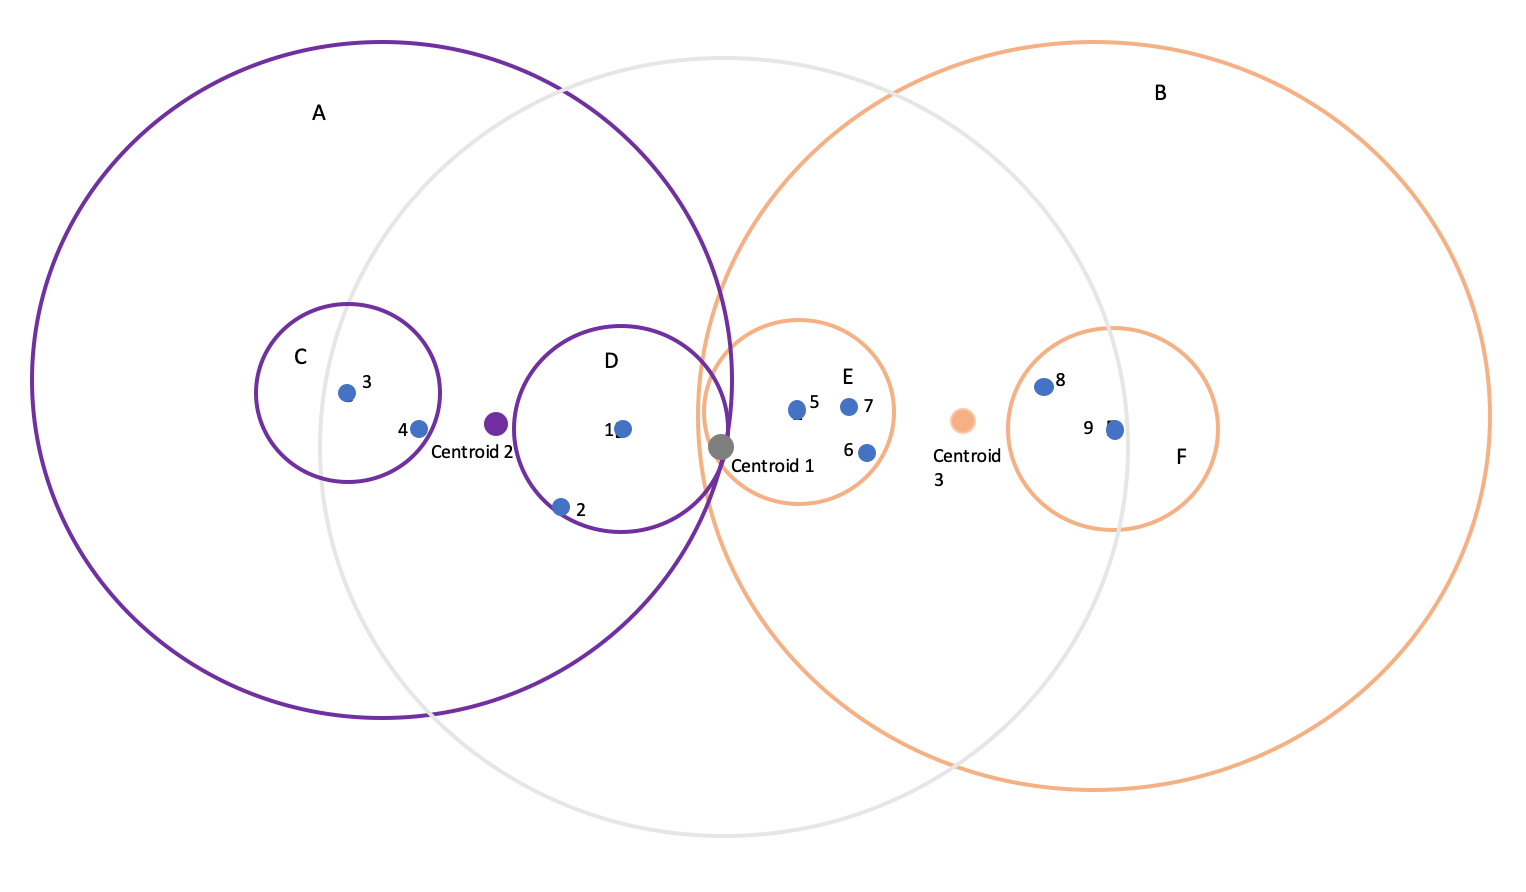

Para más información sobre su funcionamiento consultar https://en.wikipedia.org/wiki/Ball_tree

In [ ]:
%%time
# Inferencia (si queremos llamarlo así)
happiness_spain = happiness_model.predict(df_spain[feature_set].values)

CPU times: user 3.15 ms, sys: 35 µs, total: 3.18 ms
Wall time: 6.47 ms


Vemos como efectivamente los tiempos se reducen de forma muy significativa

## Conclusiones sobre el uso de algoritmos para mejorar la búsqueda
En este caso el conjunto de ejemplos es de cientos de instancias, varias preguntas:

* *¿qué pasa con los tiempos de construcción del modelo (fit)*?
* *¿y qué pasa con los tiempos de predicción (predict)*

# Referencias
[K-Neighbors Scikitlearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)